Imports & config

In [6]:
import os
import pandas as pd
import numpy as np

from sqlalchemy import create_engine

pd.set_option("display.max_columns", 200)

Connexion DB + extraction

In [7]:
DATABASE_URL = os.environ["DATABASE_URL"]  # doit exister dans ton environnement
engine = create_engine(DATABASE_URL)

QUERY = """
select
  activity_id,
  athlete_id,
  start_date,
  moving_time_s,
  distance_m,
  elevation_gain_m,
  pace_s_per_km,
  elev_m_per_km,
  avg_hr,
  max_hr,
  avg_watts,
  max_watts,
  hr_x_time,
  dist_7d_m,
  elev_7d_m,
  time_7d_s,
  dist_28d_m,
  elev_28d_m,
  time_28d_s
from activity_features
where start_date is not null
order by start_date
"""

df = pd.read_sql(QUERY, engine)
df["start_date"] = pd.to_datetime(df["start_date"], utc=True)
df.head()


,activity_id,athlete_id,start_date,moving_time_s,distance_m,elevation_gain_m,pace_s_per_km,elev_m_per_km,avg_hr,max_hr,avg_watts,max_watts,hr_x_time,dist_7d_m,elev_7d_m,time_7d_s,dist_28d_m,elev_28d_m,time_28d_s
0,4322970997,71669830,2020-11-11 15:05:09+00:00,2375,6075.8,30.1,390.895026,4.954080,None,None,NaN,None,None,6075.8,30.1,2375.0,6075.8,30.1,2375.0
1,4337168133,71669830,2020-11-14 15:17:41+00:00,2939,3743.1,54.9,785.178061,14.666987,None,None,NaN,None,None,9818.9,85.0,5314.0,9818.9,85.0,5314.0
2,4677873862,71669830,2021-01-25 09:01:38+00:00,3363,4603.0,13.8,730.610471,2.998045,None,None,NaN,None,None,4603.0,13.8,3363.0,4603.0,13.8,3363.0
3,4684305941,71669830,2021-01-26 14:29:21+00:00,833,2336.6,0.0,356.500899,0.000000,None,None,NaN,None,None,6939.6,13.8,4196.0,6939.6,13.8,4196.0
4,4717359618,71669830,2021-02-01 16:05:41+00:00,1357,3436.1,4.0,394.924478,1.164110,None,None,NaN,None,None,5772.7,4.0,2190.0,10375.7,17.8,5553.0


Contrôles qualité

In [8]:
df.info()
df.isna().mean().sort_values(ascending=False).head(15)
df.describe(percentiles=[.01,.05,.5,.95,.99]).T.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   activity_id       30 non-null     int64              
 1   athlete_id        30 non-null     int64              
 2   start_date        30 non-null     datetime64[ns, UTC]
 3   moving_time_s     30 non-null     int64              
 4   distance_m        30 non-null     float64            
 5   elevation_gain_m  30 non-null     float64            
 6   pace_s_per_km     29 non-null     float64            
 7   elev_m_per_km     29 non-null     float64            
 8   avg_hr            0 non-null      object             
 9   max_hr            0 non-null      object             
 10  avg_watts         2 non-null      float64            
 11  max_watts         0 non-null      object             
 12  hr_x_time         0 non-null      object             
 13  dist_7d

,count,mean,std,min,1%,5%,50%,95%,99%,max
activity_id,30.0,1.033042e+10,3.844314e+09,4.322971e+09,4.327088e+09,4.490486e+09,1.118337e+10,1.599578e+10,1.647279e+10,1.660420e+10
athlete_id,30.0,7.166983e+07,0.000000e+00,7.166983e+07,7.166983e+07,7.166983e+07,7.166983e+07,7.166983e+07,7.166983e+07,7.166983e+07
moving_time_s,30.0,1.971733e+03,1.032006e+03,4.900000e+02,4.911600e+02,6.344000e+02,1.743000e+03,3.978950e+03,4.056400e+03,4.068000e+03
distance_m,30.0,4.954650e+03,2.676947e+03,0.000000e+00,4.009250e+02,1.403290e+03,4.642900e+03,9.908155e+03,1.030294e+04,1.042300e+04
elevation_gain_m,30.0,2.886333e+01,2.766766e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.525000e+01,7.079500e+01,1.204360e+02,1.354000e+02
pace_s_per_km,29.0,3.839835e+02,1.111200e+02,2.633935e+02,2.684523e+02,2.830556e+02,3.565009e+02,6.062377e+02,7.698991e+02,7.851781e+02
elev_m_per_km,29.0,6.348322e+00,5.635957e+00,0.000000e+00,0.000000e+00,3.784487e-01,4.954080e+00,1.425663e+01,2.306112e+01,2.632551e+01
avg_watts,2.0,4.950000e+01,4.525483e+00,4.630000e+01,4.636400e+01,4.662000e+01,4.950000e+01,5.238000e+01,5.263600e+01,5.270000e+01
dist_7d_m,30.0,8.256617e+03,4.908085e+03,1.428700e+03,1.668501e+03,2.486855e+03,7.572000e+03,1.873558e+04,2.002407e+04,2.022820e+04
elev_7d_m,30.0,4.521000e+01,3.881226e+01,0.000000e+00,1.160000e+00,4.900000e+00,3.070000e+01,1.104650e+02,1.590820e+02,1.719000e+02


Filtrage minimal (important pour le modèle)

In [9]:
df_eda = df.copy()

# on retire pace aberrantes si présentes
df_eda = df_eda[df_eda["pace_s_per_km"].notna()]
df_eda = df_eda[(df_eda["pace_s_per_km"] > 180) & (df_eda["pace_s_per_km"] < 1200)]  # 3:00 à 20:00 min/km
df_eda = df_eda[df_eda["distance_m"].notna() & (df_eda["distance_m"] > 500)]        # > 0.5 km
df_eda = df_eda.sort_values("start_date").reset_index(drop=True)

df_eda[["start_date","distance_m","elevation_gain_m","pace_s_per_km"]].tail()


,start_date,distance_m,elevation_gain_m,pace_s_per_km
24,2024-11-30 18:01:03+00:00,10423.0,25.2,386.453037
25,2025-09-08 16:43:04+00:00,3053.6,36.5,388.066544
26,2025-09-14 09:01:03+00:00,5143.3,135.4,416.852993
27,2025-10-15 16:34:20+00:00,3221.0,0.0,383.110835
28,2025-11-29 18:16:42+00:00,10009.0,24.9,406.434209


EDA rapide & utile

<Axes: title={'center': 'elev_28d_m vs pace_s_per_km'}, xlabel='elev_28d_m', ylabel='pace_s_per_km'>

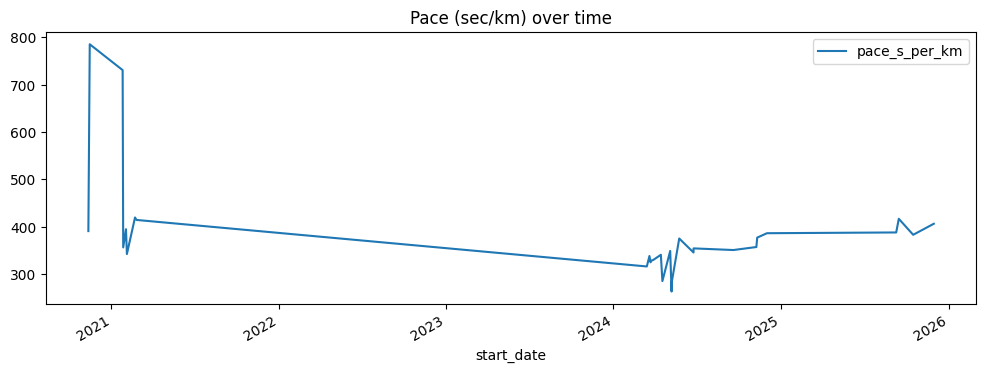

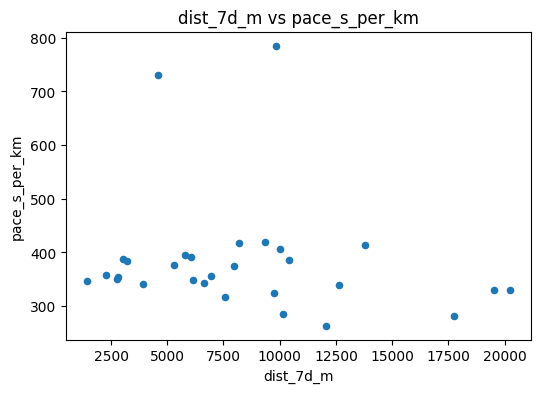

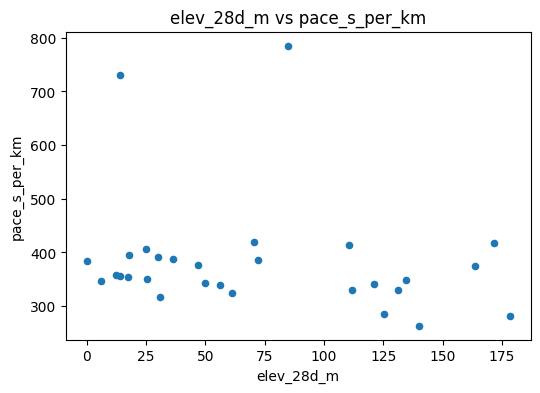

In [10]:
# évolution de l'allure dans le temps
df_eda.plot(x="start_date", y="pace_s_per_km", figsize=(12,4), title="Pace (sec/km) over time")

# charge récente vs pace
df_eda.plot.scatter(x="dist_7d_m", y="pace_s_per_km", figsize=(6,4), title="dist_7d_m vs pace_s_per_km")
df_eda.plot.scatter(x="elev_28d_m", y="pace_s_per_km", figsize=(6,4), title="elev_28d_m vs pace_s_per_km")
